In [ ]:
# http://monkeycoding.com/?tag=cornersubpix
#================================================
# Chess Board camera calibration
#================================================
#---------------------------------------
# required packages
#---------------------------------------
import numpy as np
import cv2
import glob
from google.colab.patches import cv2_imshow
#---------------------------------------

#---------------------------------------
# interactive test
#---------------------------------------
# termination criteria
corner_size=(7,6)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((7*6,3), np.float32)
print(objp.shape)
print(np.mgrid[0:7,0:6].shape)
objp[:,0:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('ChessBoard/*.jpg')
print(images)
fname = images[1]
img = cv2.imread(fname)
img.shape

cv2_imshow(img)

In [16]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(gray.shape)

# Find the chess board corners
ret, corners = cv2.findChessboardCorners(gray, corner_size, None)
print(ret)
print(corners.shape)
print(corners[0:7,0,:])
print(corners[7:14,0,:])
print(corners[35:42,0,:])

# If found, add object points, image points (after refining them)
if ret == True:
    objpoints.append(objp)
    corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
    imgpoints.append(corners2)
    # Draw and display the corners
    img = cv2.drawChessboardCorners(img, corner_size, corners2, ret)
    cv2_imshow(img)
    cv2.waitKey(0)

print(corners2.shape)
print(corners2[0:7,0,:])
print(corners2[7:14,0,:])
print(corners2[35:42,0,:])

(480, 640)
False


AttributeError: ignored

In [17]:
#---------------------------------------
# 3d object points and 2d image points
#---------------------------------------
#corner_size=(9,6)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((7*6,3), np.float32)
objp[:,0:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('ChessBoard/*.jpg')

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7,6),None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        # increase the accuracy
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (7,6), corners2,ret)
        cv2_imshow(img)
        cv2.waitKey(1000)

cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.

In [18]:
#---------------------------------------
# calibration parameters
#---------------------------------------
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
# ret
ret
# mtx: camera matrix, 3*3 matrix
mtx
# dist: lense distortion, k1,k2,p1,p2,k3
dist
# rvecs: rotaton vector, list of N sublists, each sublist is a list of 3 doubles
rvecs
# tvecs: translation vector, list of N sublists, each sublist is a list of 3 doubles
tvecs

# A rotation vector is a convenient and most compact representation of a rotation matrix
# since any rotation matrix has just 3 degrees of freedom.

#---------------------------------------
# calibrating, 2 methods
#---------------------------------------
img = cv2.imread('ChessBoard/left12.jpg')
h, w = img.shape[:2]
h
w
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))
newcameramtx
roi

(11, 22, 615, 438)

In [19]:
print(mtx)

[[534.07088623   0.         341.53407107]
 [  0.         534.11914798 232.94565221]
 [  0.           0.           1.        ]]


In [20]:
print(dist)

[[-2.92971621e-01  1.07706887e-01  1.31038490e-03 -3.11022977e-05
   4.34799142e-02]]


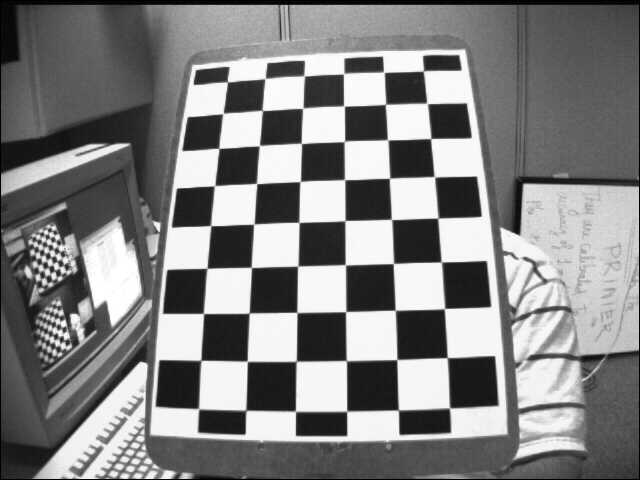

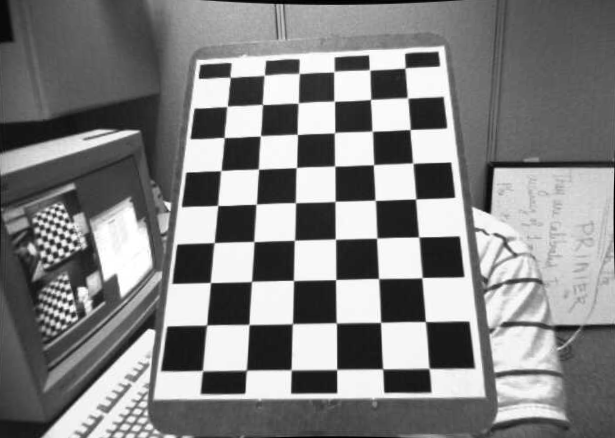

True

In [21]:
#---------------------------------------
# undistort method 1, simple
#dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
#x,y,w,h = roi
#dst = dst[y:y+h, x:x+w]
#cv2.imshow('img',img)
#cv2.imshow('dst',dst)
#cv2.waitKey(0)
#cv2.imwrite('calibresult.png',dst)

#---------------------------------------
# undistort method 2
mapx,mapy = cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
dst = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)
# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2_imshow(img)
cv2_imshow(dst)
cv2.waitKey(0)
cv2.imwrite('calibresult.png',dst)


In [22]:

#---------------------------------------
# Re-projection Error
#---------------------------------------
total_error = 0
for i in xrange(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i],imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    total_error += error

print("total error: ", total_error/len(objpoints))
#================================================

NameError: ignored